<a href="https://colab.research.google.com/github/Jisang-hwang93/Machine-Learning-for-Study/blob/master/01%20%EB%AA%A8%EB%91%90%EC%9D%98%20%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[모두의 딥러닝]**
저자 : 조태호 / 출판사 : 깃벗

# **1장 폐얌 수술 환자의 생존율 예측하기**

In [1]:
# 케라스 함수 호출
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 라이브러리 호출
import numpy as np
import tensorflow as tf

In [2]:
# 같은 결과를 출력하기 위해 설정
np.random.seed(3)
tf.random.set_seed(3)

In [3]:
# 데이터셋 불러오기
data_set = np.loadtxt("/content/datasets/ThoraricSurgery.csv", delimiter=",")

# 환자의 기록 X, 수술 결과 Y로 구분하여 저장
X = data_set[:, 0:17]
Y = data_set[:, 17]

In [4]:
# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim=17, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [5]:
# 실행
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=10, batch_size = 10)

Epoch 1/10
47/47 [==============================] - 0s 2ms/step - loss: 0.1485 - accuracy: 0.8426
Epoch 2/10
47/47 [==============================] - 0s 2ms/step - loss: 0.1402 - accuracy: 0.8511
Epoch 3/10
47/47 [==============================] - 0s 2ms/step - loss: 0.1433 - accuracy: 0.8489
Epoch 4/10
47/47 [==============================] - 0s 2ms/step - loss: 0.1395 - accuracy: 0.8511
Epoch 5/10
47/47 [==============================] - 0s 2ms/step - loss: 0.1386 - accuracy: 0.8468
Epoch 6/10
47/47 [==============================] - 0s 2ms/step - loss: 0.1407 - accuracy: 0.8511
Epoch 7/10
47/47 [==============================] - 0s 2ms/step - loss: 0.1336 - accuracy: 0.8489
Epoch 8/10
47/47 [==============================] - 0s 2ms/step - loss: 0.1384 - accuracy: 0.8511
Epoch 9/10
47/47 [==============================] - 0s 2ms/step - loss: 0.1377 - accuracy: 0.8383
Epoch 10/10
47/47 [==============================] - 0s 2ms/step - loss: 0.1438 - accuracy: 0.8447


# **3장 선형 회귀**

In [6]:
# 최소제곱법 구현하기
import numpy as np

# x, y 데이터
x = [2, 4, 6, 8]
y = [81, 93, 91, 97]

# x, y 평균
mx = np.mean(x)
my = np.mean(y)

# 최소 제곱근 공식의 분모 값 = x의 각 원소와 x의 평균값 차의 제곱합
divisor = sum([(i - mx)**2 for i in x])

# 최소 제곱근 공식의 분자 값 = x와 y의 편차를 곱해서 합한 값
def top (x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    
    return d
dividend = top(x, mx, y, my)

# 기울기 a
a = dividend / divisor

# 절편 b
b = my - (mx*a)

# 출력
print("분모 : {}".format(divisor))
print("분자 : {}".format(dividend))
print("기울기 a : {}".format(a))
print("y절편 b : {}".format(b))

분모 : 20.0
분자 : 46.0
기울기 a : 2.3
y절편 b : 79.0


In [7]:
# 평균 제곱 오차(MSE) 구현하기

# 임의로 기울기 a, y절편 b 지정
fake_a_b = [3, 76]

# x, y 데이터 생성
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

# predict 함수 생성
def predict(x):
    return fake_a_b[0]*x + fake_a_b[1]

# MSE 함수 생성
def mse(y_hat, y):
    return ((y_hat-y)**2).mean()

# 예측 결과값 함수 생성
def mse_val(predict_result, y):
    return mse(np.array(predict_result), np.array(y))

predict_result = []

for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부시간 = {}, 실제 섬수 = {}, 예측 점수 = {}".format(x[i], y[i], predict(x[i])))

# 최종 MSE
print("MSE 최종값 : " + str(mse_val(predict_result, y)))

공부시간 = 2, 실제 섬수 = 81, 예측 점수 = 82
공부시간 = 4, 실제 섬수 = 93, 예측 점수 = 88
공부시간 = 6, 실제 섬수 = 91, 예측 점수 = 94
공부시간 = 8, 실제 섬수 = 97, 예측 점수 = 100
MSE 최종값 : 11.0


# **4장 경사 하강법**

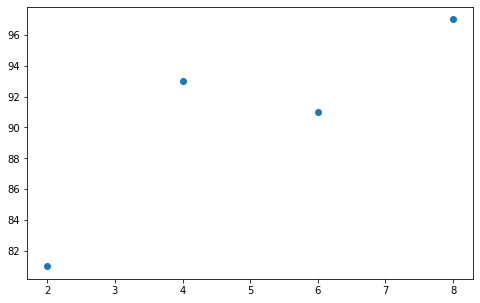

In [8]:
# 경사 하강법
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 공부시간 X, 성적 Y 데이터
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

# 그래프
plt.figure(figsize=(8,5))
plt.scatter(x,y)
plt.show()

epoch : 0, 기울기 = 23.200000000000003, y절편 = 4.525
epoch : 100, 기울기 = 7.931567860803662, y절편 = 45.39321145915032
epoch : 200, 기울기 = 4.7952580810839684, y절편 = 64.1093669190256
epoch : 300, 기울기 = 3.4056091385403784, y절편 = 72.40219749701195
epoch : 400, 기울기 = 2.7898778112334544, y절편 = 76.07661872858483
epoch : 500, 기울기 = 2.5170570607400276, y절편 = 77.70469629028896
epoch : 600, 기울기 = 2.3961745287023133, y절편 = 78.42607154366186
epoch : 700, 기울기 = 2.3426134028516565, y절편 = 78.7457014362538
epoch : 800, 기울기 = 2.3188813205232144, y절편 = 78.88732435409113
epoch : 900, 기울기 = 2.3083660125886047, y절편 = 78.95007521476352


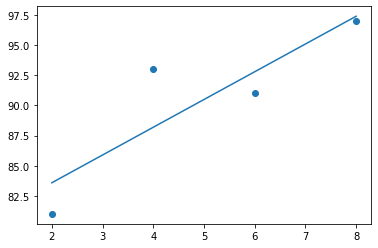

In [9]:
# x, y 배열 변경
x_data = np.array(x)
y_data = np.array(y)

# 기울기 a, y절편 b 초기화
a = 0
b = 0

# 학습률(alpha) 설정
alpha = 0.05

# 반복 횟수
epochs = 1000

# 경사 하강법
for i in range(epochs):
    y_pred = a * x_data + b
    error = y_data - y_pred
    # 오차 함수에서 a로 편미분
    a_diff = -(1/len(x_data)) * sum(x_data * (error)) # 왜 2가 아닌 1을 곱하는지 왜 음수처리되는지 이해 x
    # 오차 함수에서 b로 편미분
    b_diff = -(1/len(x_data)) * sum(y_data - y_pred)
    # a, b값 업데이트
    a = a - alpha * a_diff
    b = b - alpha * b_diff
    # a, b값 출력
    if i % 100 == 0:
        print("epoch : {}, 기울기 = {}, y절편 = {}".format(i, a, b))

# 구한 기울기와 y절편을 이용한 그래프
y_pred = a * x_data + b
plt.scatter(x,y)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
plt.show()

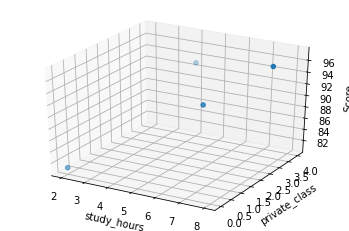

epoch : 0, 기울기1 = 23.200000000000003, 기울기2 = 10.5625, y절편 = 4.525
epoch : 10, 기울기1 = 13.466726172284988, 기울기2 = 6.429698487945293, y절편 = 8.786250518309092
epoch : 20, 기울기1 = 11.16842473366212, 기울기2 = 5.56632810103147, y절편 = 13.844209760436728
epoch : 30, 기울기1 = 10.185153147750025, 기울기2 = 5.245095721184715, y절편 = 18.70487408325936
epoch : 40, 기울기1 = 9.474390715685113, 기울기2 = 5.0176991433260065, y절편 = 23.225708678107445
epoch : 50, 기울기1 = 8.853805855621124, 기울기2 = 4.8138830022314805, y절편 = 27.406034806250627
epoch : 60, 기울기1 = 8.287994008521752, 기울기2 = 4.6239711215704995, y절편 = 31.26736829302509
epoch : 70, 기울기1 = 7.767331052578328, 기울기2 = 4.446948669011705, y절편 = 34.83333655173105
epoch : 80, 기울기1 = 7.28713577107621, 기울기2 = 4.282521940701446, y절편 = 38.12640350895015
epoch : 90, 기울기1 = 6.843950500471186, 기울기2 = 4.130183863764953, y절편 = 41.1674278373613
epoch : 100, 기울기1 = 6.434805446608685, 기울기2 = 3.98925524892891, y절편 = 43.97569356791496


In [10]:
# 다중 선형 회귀

# 데이터 셋
data = [[2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]]
x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y = [i[2] for i in data]

# 3D 그래프 출력
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

ax = plt.axes(projection = '3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('Score')
ax.scatter(x1, x2, y)
plt.show()

# 넘파이 배열
x1_data = np.array(x1)
x2_data = np.array(x2)
y_data = np.array(y)

# 기울기 a, y절편 초기화
a1 = 0
a2 = 0
b = 0

# 학습률
lr = 0.05

# 반복 횟수
epochs = 101

# 경사 하강법
for i in range(epochs):
    y_pred = a1*x1_data + a2*x2_data + b
    error = y_data - y_pred

    # 편미분 a1, a2, b
    a1_diff = -(1/len(x1_data)) * sum(x1_data * error)
    a2_diff = -(1/len(x2_data)) * sum(x2_data * error)
    b_diff = -(1/len(x1_data)) * sum(error)

    # 업데이트 a1, a2, b
    a1 = a1 - lr*a1_diff
    a2 = a2 - lr*a2_diff
    b = b - lr*b_diff

    if i % 10 == 0:
        print("epoch : {}, 기울기1 = {}, 기울기2 = {}, y절편 = {}".format(i, a1, a2, b))

# **5장 로지스틱 회귀**

(-0.1, 1.1)

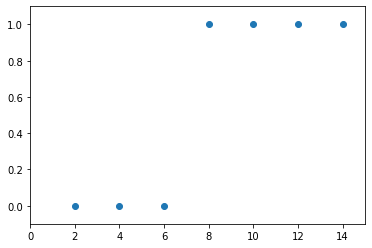

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 공부시간 X, 합격 여부 Y 데이터셋
data = [[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]]

x_data = [i[0] for i in data]
y_data = [i[1] for i in data]

# 그래프 출력
plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)

epoch : 0, 기울기 a = 0.28614859821686867, y절편 b = -0.004268789453254262
epoch : 10, 기울기 a = 0.3586121237826652, y절편 b = -0.6669174068924866
epoch : 20, 기울기 a = 0.45679696453160923, y절편 b = -1.6059167950263658
epoch : 30, 기울기 a = 0.5892706539729232, y절편 b = -2.791333599052746
epoch : 40, 기울기 a = 0.7457909298162035, y절편 b = -4.1166389260136205
epoch : 50, 기울기 a = 0.9167254395099746, y절편 b = -5.508461669339117
epoch : 60, 기울기 a = 1.0971636882546743, y절편 b = -6.936875948950712
epoch : 70, 기울기 a = 1.2844478515786426, y절편 b = -8.388528883465973
epoch : 80, 기울기 a = 1.4767667467136092, y절편 b = -9.855796306217027
epoch : 90, 기울기 a = 1.6727030100962264, y절편 b = -11.333695943679494
epoch : 100, 기울기 a = 1.8711016106835927, y절편 b = -12.81882698664439


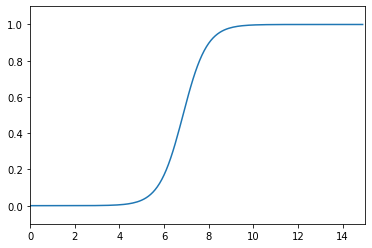

In [12]:
# 기울기 a, y절편 b 초기화
a = 0
b = 0

# 학습률 설정
lr = 0.05

# 시그모이드 함수 정의
def sigmoid(x):
    return (1 / (1 + np.e**(-x)))

# 경사 하강법
for i in range (101):
    for x_data, y_data in data:
        # 기울기 a, y절편 b 편미분
        a_diff = x_data * (sigmoid(a*x_data + b) - y_data)
        b_diff = sigmoid(a*x_data) - y_data
        
        # 업데이트 기울기 a, y절편 b
        a = a - lr * a_diff
        b = b - lr * b_diff

    if i % 10 == 0:
        print("epoch : {}, 기울기 a = {}, y절편 b = {}".format(i, a, b))

# 그래프 출력
plt.scatter(x,y)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
x_range = (np.arange(0, 15, 0.1))
plt.plot(np.arange(0, 15, 0.1), np.array([sigmoid(a*x + b) for x in x_range]))
plt.show()

# **7장 다층 퍼셉트론**

In [13]:
import numpy as np

# 가중치와 바이어스
w11 = np.array([-2, -2])
w12 = np.array([2, 2])
w2 = np.array([1, 1])
b1 = 3
b2 = -1
b3 = -1

# 다층 퍼셉트론 함수
def MLP(x, w, b):
    y = np.sum(w*x) + b
    if y <= 0:
        return 0
    else:
        return 1

# NAND 게이트
def NAND(x1, x2):
    return MLP(np.array([x1, x2]), w11, b1)

# OR 게이트
def OR(x1, x2):
    return MLP(np.array([x1, x2]), w12, b2)

# AND 게이트
def AND(x1, x2):
    return MLP(np.array([x1, x2]), w2, b3)

# XOR 게이트
def XOR(x1, x2):
    return AND(NAND(x1, x2), OR(x1, x2))

# 최종값 출력
if __name__ == '__main__':
    for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = XOR(x[0], x[1])
        print("입력값 : {}, 출력값 : {}".format(str(x), str(y)))

입력값 : (0, 0), 출력값 : 0
입력값 : (1, 0), 출력값 : 1
입력값 : (0, 1), 출력값 : 1
입력값 : (1, 1), 출력값 : 0


# **11장 피마 인디언 데이터 분석**

In [14]:
# 피마 인디언 데이터 불러오기
import pandas as pd
df = pd.read_csv('/content/datasets/pima-indians-diabetes.csv',
                 names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI",
                          "pedigree", "age", "class"])
df

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
# 데이터셋 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
# 데이터셋 특징
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


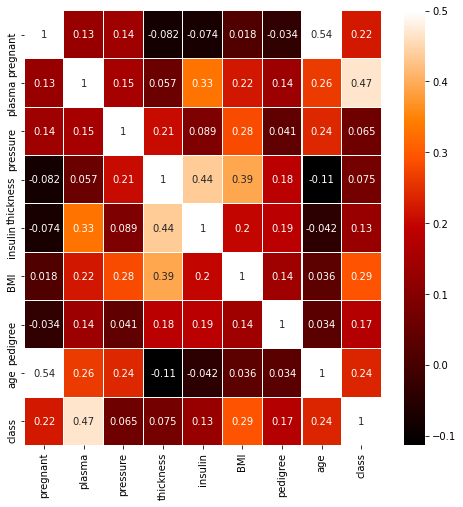

In [17]:
# 상관관계 그래프 출력
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 크기 설정
plt.figure(figsize = (8,8))

# seaborn 라이브러리 사용 - 상관관계 그래프
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat,
            linecolor='white', annot=True)
plt.show()

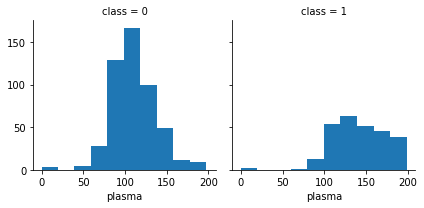

In [18]:
# plasma 정보와 class 관계 그래프 출력
import matplotlib.pyplot as plt
import seaborn as sns

grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

In [20]:
# 피마 인디언의 당뇨병 예측
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import tensorflow as tf

# seed값 생성
np.random.seed(3)
tf.random.set_seed(3)

# 데이터 불러오기
dataset = np.loadtxt('/content/datasets/pima-indians-diabetes.csv', delimiter =',')
X = dataset[:, 0:8]
Y = dataset[:, 8]

# 모델 설정
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

# 모델 컴파일
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 모델 실행
model.fit(X, Y, epochs=50, batch_size=10)

# 결과 출력
print("\n Accuracy : {}".format(model.evaluate(X, Y)[1]))

Epoch 1/50
77/77 [==============================] - 0s 2ms/step - loss: 10.5440 - accuracy: 0.6159
Epoch 2/50
77/77 [==============================] - 0s 2ms/step - loss: 5.4366 - accuracy: 0.6029
Epoch 3/50
77/77 [==============================] - 0s 2ms/step - loss: 2.9292 - accuracy: 0.5208
Epoch 4/50
77/77 [==============================] - 0s 2ms/step - loss: 1.5346 - accuracy: 0.5208
Epoch 5/50
77/77 [==============================] - 0s 2ms/step - loss: 0.8896 - accuracy: 0.5000
Epoch 6/50
77/77 [==============================] - 0s 2ms/step - loss: 0.8072 - accuracy: 0.5234
Epoch 7/50
77/77 [==============================] - 0s 3ms/step - loss: 0.7655 - accuracy: 0.6549
Epoch 8/50
77/77 [==============================] - 0s 2ms/step - loss: 0.7306 - accuracy: 0.6628
Epoch 9/50
77/77 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.6706
Epoch 10/50
77/77 [==============================] - 0s 2ms/step - loss: 0.6656 - accuracy: 0.6758
Epoch 11/50
77/77 

# **12장 아이리스 품종 예측하기**

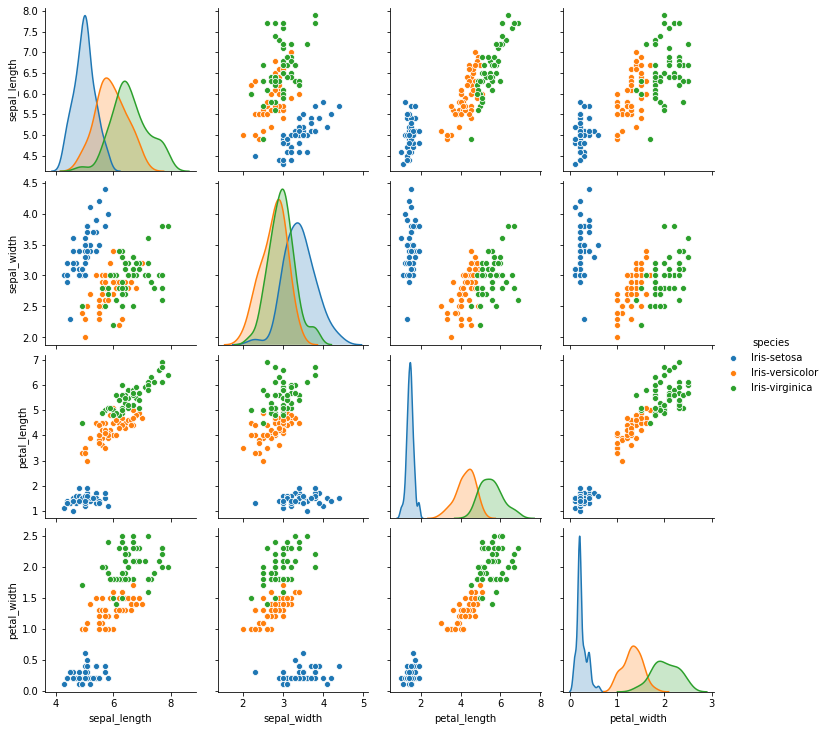

In [21]:
# 아이리스 품종 예측하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

# seed 값 설정
np.random.seed(3)
tf.random.set_seed(3)

# 데이터 입력
df = pd.read_csv('/content/datasets/iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

# 상관도 그래프 출력
sns.pairplot(df, hue='species')
plt.show()

In [22]:
# 데이터 분류
dataset = df.values
X = dataset[:, 0:4].astype(float)
Y_obj = dataset[:, 4]

# 클래스(Y) 이름 숫자 형태로 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

# Y값을 0과 1로 변환
Y_encoded = tf.keras.utils.to_categorical(Y)

In [23]:
# 모델 설정
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
model.fit(X, Y_encoded, epochs = 25, batch_size = 1)

# 결과 출력
print("\n Accuracy : {}".format(model.evaluate(X, Y_encoded)[1]))

Epoch 1/25
150/150 [==============================] - 0s 2ms/step - loss: 1.3259 - accuracy: 0.3333
Epoch 2/25
150/150 [==============================] - 0s 2ms/step - loss: 0.8409 - accuracy: 0.6333
Epoch 3/25
150/150 [==============================] - 0s 2ms/step - loss: 0.7110 - accuracy: 0.7267
Epoch 4/25
150/150 [==============================] - 0s 2ms/step - loss: 0.6229 - accuracy: 0.6867
Epoch 5/25
150/150 [==============================] - 0s 2ms/step - loss: 0.5542 - accuracy: 0.7933
Epoch 6/25
150/150 [==============================] - 0s 2ms/step - loss: 0.4988 - accuracy: 0.9067
Epoch 7/25
150/150 [==============================] - 0s 2ms/step - loss: 0.4562 - accuracy: 0.9133
Epoch 8/25
150/150 [==============================] - 0s 2ms/step - loss: 0.4287 - accuracy: 0.9067
Epoch 9/25
150/150 [==============================] - 0s 2ms/step - loss: 0.4006 - accuracy: 0.9267
Epoch 10/25
150/150 [==============================] - 0s 2ms/step - loss: 0.3773 - accuracy: 0.9733

# **13장 초음파 광물 예측하기**

In [27]:
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

import numpy as np
import pandas as pd
import tensorflow as tf

# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# 데이터 입력
df = pd.read_csv('/content/datasets/sonar.csv', header = None)

# X, Y 데이터 입력
dataset = df.values
X = dataset[:, 0:60]
Y_obj = dataset[:, 60]

# 라벨 부여
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

# 10개의 파일로 데이터셋 조깨기
n_fold = 10
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

# accuracy 리스트
accuracy = []

# 모델 설정, 컴파일, 실행
for train, test in skf.split(X, Y):
    model = Sequential()
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    model.fit(X[train], Y[train], epochs=10, batch_size=5)
    # K겹 교차 검증(K-Fold CV)
    K_accuracy = model.evaluate(X[test], Y[test])[1]
    accuracy.append(K_accuracy)

print("\n fold_accuracy : {}".format(n_fold, accuracy))

Epoch 1/10
187/187 [==============================] - 0s 1ms/step - loss: 0.2470 - accuracy: 0.5348
Epoch 2/10
187/187 [==============================] - 0s 599us/step - loss: 0.2290 - accuracy: 0.7433
Epoch 3/10
187/187 [==============================] - 0s 587us/step - loss: 0.2170 - accuracy: 0.6684
Epoch 4/10
187/187 [==============================] - 0s 555us/step - loss: 0.1976 - accuracy: 0.7166
Epoch 5/10
187/187 [==============================] - 0s 551us/step - loss: 0.1883 - accuracy: 0.7701
Epoch 6/10
187/187 [==============================] - 0s 566us/step - loss: 0.1745 - accuracy: 0.7968
Epoch 7/10
187/187 [==============================] - 0s 638us/step - loss: 0.1625 - accuracy: 0.8182
Epoch 8/10
187/187 [==============================] - 0s 564us/step - loss: 0.1552 - accuracy: 0.7968
Epoch 9/10
187/187 [==============================] - 0s 547us/step - loss: 0.1472 - accuracy: 0.8128
Epoch 10/10
21/21 [==============================] - 0s 787us/step
Epoch 1/10
187/18

# **14장 와인의 종류 예측하기**

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy as np
import tensorflow as tf
import os

# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# 데이터 입력
df_pre = pd.read_csv('/content/datasets/wine.csv', header=None)
df = df_pre.sample(frac=1) # frac=1은 원본 데이터를 랜덤으로 100% 불러오라는 의미
dataset = df.values

# X, Y 설정
X = dataset[:, 0:12]
Y = dataset[:, 12]

# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 저장 폴더 설정
model_dir = '/content/model/'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

# 모델 저장 조건 설정
modelpath = "/content/model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 모델 실행 및 저장
model.fit(X, Y, validation_split=0.2, epochs=10, batch_size=200, verbose=0, callbacks=[checkpointer])


Epoch 00001: val_loss improved from inf to 1.72119, saving model to /content/model/01-1.7212.hdf5

Epoch 00002: val_loss improved from 1.72119 to 0.30135, saving model to /content/model/02-0.3013.hdf5

Epoch 00003: val_loss improved from 0.30135 to 0.23678, saving model to /content/model/03-0.2368.hdf5

Epoch 00004: val_loss improved from 0.23678 to 0.21831, saving model to /content/model/04-0.2183.hdf5

Epoch 00005: val_loss improved from 0.21831 to 0.20798, saving model to /content/model/05-0.2080.hdf5

Epoch 00006: val_loss improved from 0.20798 to 0.20367, saving model to /content/model/06-0.2037.hdf5

Epoch 00007: val_loss improved from 0.20367 to 0.20001, saving model to /content/model/07-0.2000.hdf5

Epoch 00008: val_loss improved from 0.20001 to 0.19788, saving model to /content/model/08-0.1979.hdf5

Epoch 00009: val_loss improved from 0.19788 to 0.19546, saving model to /content/model/09-0.1955.hdf5

Epoch 00010: val_loss did not improve from 0.19546


Train on 4352 samples, validate on 2145 samples
Epoch 1/10
4352/4352 [==============================] - 0s 11us/step - loss: 0.1954 - accuracy: 0.9318 - val_loss: 0.1838 - val_accuracy: 0.9361
Epoch 2/10
4352/4352 [==============================] - 0s 10us/step - loss: 0.1948 - accuracy: 0.9304 - val_loss: 0.1829 - val_accuracy: 0.9361
Epoch 3/10
4352/4352 [==============================] - 0s 10us/step - loss: 0.1940 - accuracy: 0.9308 - val_loss: 0.1828 - val_accuracy: 0.9352
Epoch 4/10
4352/4352 [==============================] - 0s 10us/step - loss: 0.1933 - accuracy: 0.9313 - val_loss: 0.1822 - val_accuracy: 0.9361
Epoch 5/10
4352/4352 [==============================] - 0s 9us/step - loss: 0.1927 - accuracy: 0.9311 - val_loss: 0.1818 - val_accuracy: 0.9361
Epoch 6/10
4352/4352 [==============================] - 0s 10us/step - loss: 0.1920 - accuracy: 0.9320 - val_loss: 0.1816 - val_accuracy: 0.9352
Epoch 7/10
4352/4352 [==============================] - 0s 10us/step - loss: 0.1914

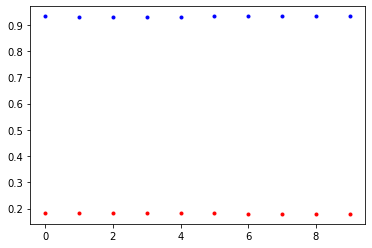

In [30]:
# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.33, epochs=10, batch_size=500)

# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss = history.history['val_loss']

# y_acc에 테스트셋으로 측정한 정확도의 값을 저장
y_acc = history.history['accuracy']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c='red', markersize=3)
plt.plot(x_len, y_acc, "o", c='blue', markersize=3)

plt.show()

# **15장 선형 회귀 적용하기**

In [31]:
# 보스턴 집값 예측하기
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import tensorflow as tf

# seed값 설정하기
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# 데이터 불러오기
df = pd.read_csv('/content/datasets/housing.csv', delim_whitespace=True, header=None)
dataset = df.values

# X, Y 값 설정
X = dataset[:, 0:13]
Y = dataset[:, 13]

# train_set, test_set 구분하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

# 모델링
model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 피팅
model.fit(X_train, Y_train, epochs=20, batch_size=10)

# 예측 값과 실제 값 비교
Y_prediction = model.predict(X_test).flatten()
for i in range(10):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제가격 : {:.3f}, 예상가격 : {:.3f}".format(label, prediction))

Epoch 1/20
354/354 [==============================] - 0s 495us/step - loss: 1788.5214
Epoch 2/20
354/354 [==============================] - 0s 261us/step - loss: 197.8171
Epoch 3/20
354/354 [==============================] - 0s 248us/step - loss: 113.0738
Epoch 4/20
354/354 [==============================] - 0s 253us/step - loss: 82.6328
Epoch 5/20
354/354 [==============================] - 0s 270us/step - loss: 68.4429
Epoch 6/20
354/354 [==============================] - 0s 253us/step - loss: 63.6600
Epoch 7/20
354/354 [==============================] - 0s 254us/step - loss: 58.5631
Epoch 8/20
354/354 [==============================] - 0s 255us/step - loss: 57.7878
Epoch 9/20
354/354 [==============================] - 0s 260us/step - loss: 55.6108
Epoch 10/20
354/354 [==============================] - 0s 254us/step - loss: 54.5901
Epoch 11/20
354/354 [==============================] - 0s 280us/step - loss: 52.8477
Epoch 12/20
354/354 [==============================] - 0s 264us/step -

# **16장 CNN 익히기**

## **딥러닝 기본 프레임 적용**

학습셋 이미지 개수 : 60000개
테스트셋 이미지 개수 : 10000개


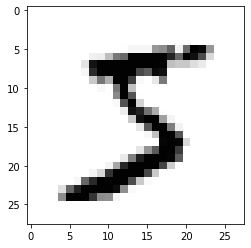

In [44]:
# 데이터 전처리
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.datasets import mnist
from keras.utils import np_utils

import numpy as np
import os
import sys
import tensorflow as tf

# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# MNIST 데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print("학습셋 이미지 개수 : {}개".format(X_train.shape[0]))
print("테스트셋 이미지 개수 : {}개".format(X_test.shape[0]))

# 그래프로 확인
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [33]:
# 확인
for x in X_train[0]:
    for i in x:
        sys.stdout.write('{}\t'.format(i))
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [34]:
# 차원 변환 및 정규화
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [35]:
# 클래스 바이너리 화
print("class : {}".format(Y_class_train[0]))

# 바이너리화 과정
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

print(Y_train[0])

class : 5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [36]:
# 모델링
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
# 모델 저장 경로
model_dir = '/content/model'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

modelpath = '/content/model/{epoch:02d}-{val_loss:4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 조기 종료
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [38]:
# 모델 피팅
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print('\n Test Accuracy : {:.4f}'.format(model.evaluate(X_test, Y_test)[1]))


Epoch 00001: val_loss improved from inf to 0.15443, saving model to /content/model/01-0.154427.hdf5

Epoch 00002: val_loss improved from 0.15443 to 0.10450, saving model to /content/model/02-0.104503.hdf5

Epoch 00003: val_loss improved from 0.10450 to 0.08548, saving model to /content/model/03-0.085483.hdf5

Epoch 00004: val_loss improved from 0.08548 to 0.07768, saving model to /content/model/04-0.077677.hdf5

Epoch 00005: val_loss improved from 0.07768 to 0.06882, saving model to /content/model/05-0.068823.hdf5

Epoch 00006: val_loss improved from 0.06882 to 0.06197, saving model to /content/model/06-0.061966.hdf5

Epoch 00007: val_loss did not improve from 0.06197

Epoch 00008: val_loss improved from 0.06197 to 0.05988, saving model to /content/model/08-0.059876.hdf5

Epoch 00009: val_loss improved from 0.05988 to 0.05738, saving model to /content/model/09-0.057379.hdf5

Epoch 00010: val_loss did not improve from 0.05738
10000/10000 [==============================] - 1s 54us/step


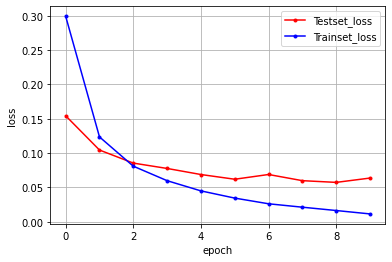

In [39]:
# testset 오차
y_vloss = history.history['val_loss']

# trainset 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## **CNN 적용**

In [47]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import os
import tensorflow as tf

# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# MNist 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

X_train.shape, Y_train.shape

((60000, 28, 28, 1), (60000, 10))

In [48]:
# 모델링
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

In [49]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
# 모델 저장 경로
model_dir = '/content/model'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

modelpath = '/content/model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 조기 종료
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델 피팅
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy : {:.4f}".format(model.evaluate(X_test, Y_test)[1]))


Epoch 00001: val_loss improved from inf to 0.05508, saving model to /content/model/01-0.0551.hdf5

Epoch 00002: val_loss improved from 0.05508 to 0.04125, saving model to /content/model/02-0.0412.hdf5

Epoch 00003: val_loss improved from 0.04125 to 0.03246, saving model to /content/model/03-0.0325.hdf5

Epoch 00004: val_loss did not improve from 0.03246

Epoch 00005: val_loss improved from 0.03246 to 0.03218, saving model to /content/model/05-0.0322.hdf5

Epoch 00006: val_loss improved from 0.03218 to 0.02823, saving model to /content/model/06-0.0282.hdf5

Epoch 00007: val_loss did not improve from 0.02823

Epoch 00008: val_loss did not improve from 0.02823

Epoch 00009: val_loss improved from 0.02823 to 0.02709, saving model to /content/model/09-0.0271.hdf5

Epoch 00010: val_loss did not improve from 0.02709

Epoch 00011: val_loss did not improve from 0.02709

Epoch 00012: val_loss improved from 0.02709 to 0.02595, saving model to /content/model/12-0.0259.hdf5

Epoch 00013: val_loss 

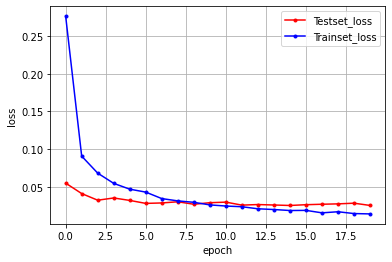

In [51]:
import matplotlib.pyplot as plt

# Testset의 오차
y_vloss = history.history['val_loss']

# Testset의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# **17장 딥러닝을 이용한 자연어 처리**

## **주어진 문장을 '단어'로 토큰화하기**

In [52]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

# 전처리할 텍스트
text = "해보지 않으면 해낼 수 없다"

# 텍스트 토큰화
result = text_to_word_sequence(text)
print("\n원문 :\n", text)
print("\n토큰화 :\n", result)


원문 :
 해보지 않으면 해낼 수 없다

토큰화 :
 ['해보지', '않으면', '해낼', '수', '없다']


In [53]:
from keras.preprocessing.text import Tokenizer

# 전처리할 문장
docs = ["먼저 텍스트의 각 단어를 나누어 토큰화 합니다.",
        "텍스트의 단어로 토큰화 해야 딥러닝에서 인식됩니다.",
        "토큰화 한 결과는 딥러닝에서 사용할 수 있습니다."]

# 전처리 과정
token = Tokenizer()
token.fit_on_texts(docs)

# 단어 빈도수를 계산한 결과 출력
print('\n단어 카운트 :\n', token.word_counts)
print('\n문장 카운트 :', token.document_count)
print('\n각 단어가 몇 개의 문장에 포함되어 있는가 :\n', token.word_docs)
print('\n각 단어에 매겨진 인덱스 값:\n', token.word_index)


단어 카운트 :
 OrderedDict([('먼저', 1), ('텍스트의', 2), ('각', 1), ('단어를', 1), ('나누어', 1), ('토큰화', 3), ('합니다', 1), ('단어로', 1), ('해야', 1), ('딥러닝에서', 2), ('인식됩니다', 1), ('한', 1), ('결과는', 1), ('사용할', 1), ('수', 1), ('있습니다', 1)])

문장 카운트 : 3

각 단어가 몇 개의 문장에 포함되어 있는가 :
 defaultdict(<class 'int'>, {'단어를': 1, '토큰화': 3, '각': 1, '나누어': 1, '합니다': 1, '텍스트의': 2, '먼저': 1, '해야': 1, '단어로': 1, '인식됩니다': 1, '딥러닝에서': 2, '있습니다': 1, '한': 1, '사용할': 1, '수': 1, '결과는': 1})

각 단어에 매겨진 인덱스 값:
 {'토큰화': 1, '텍스트의': 2, '딥러닝에서': 3, '먼저': 4, '각': 5, '단어를': 6, '나누어': 7, '합니다': 8, '단어로': 9, '해야': 10, '인식됩니다': 11, '한': 12, '결과는': 13, '사용할': 14, '수': 15, '있습니다': 16}


## **영화 리뷰가 긍정적인지 부정적인지 예측하기**

In [54]:
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding

import numpy as np
import tensorflow as tf

# 텍스트 리뷰 자료 지정
docs = ['너무 재밌네요', '최고에요', '참 잘 만든 영화에요', '추천하고 싶은 영화입니다', '한번 더 보고싶네요', '글쎄요', '별로에요', '생각보다 지루하네요',
        '연기가 어색해요', '재미없어요']

# 긍정 리뷰는 1, 부정 리뷰는 0으로 클래스 지정
classes = array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

# 토큰화
token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_index)

{'너무': 1, '재밌네요': 2, '최고에요': 3, '참': 4, '잘': 5, '만든': 6, '영화에요': 7, '추천하고': 8, '싶은': 9, '영화입니다': 10, '한번': 11, '더': 12, '보고싶네요': 13, '글쎄요': 14, '별로에요': 15, '생각보다': 16, '지루하네요': 17, '연기가': 18, '어색해요': 19, '재미없어요': 20}


In [55]:
# 서로 다른 길이의 데이터를 4로 맞춤
x = token.texts_to_sequences(docs)
padded_x = pad_sequences(x, 4)
print("\n패딩 결과 :\n", padded_x)


패딩 결과 :
 [[ 0  0  1  2]
 [ 0  0  0  3]
 [ 4  5  6  7]
 [ 0  8  9 10]
 [ 0 11 12 13]
 [ 0  0  0 14]
 [ 0  0  0 15]
 [ 0  0 16 17]
 [ 0  0 18 19]
 [ 0  0  0 20]]


In [56]:
# 임베딩에 입력될 단어 개수 지정
word_size = len(token.word_index) + 1

# 모델링
model = Sequential()
model.add(Embedding(word_size, 8, input_length=4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
# 모델 피팅
model.fit(padded_x, classes, epochs=20)

Epoch 1/20
1/1 [==============================] - 0s 1ms/step - loss: 0.6974 - accuracy: 0.3000
Epoch 2/20
1/1 [==============================] - 0s 1ms/step - loss: 0.6958 - accuracy: 0.4000
Epoch 3/20
1/1 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4000
Epoch 4/20
1/1 [==============================] - 0s 843us/step - loss: 0.6924 - accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 1ms/step - loss: 0.6908 - accuracy: 0.6000
Epoch 6/20
1/1 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.8000
Epoch 7/20
1/1 [==============================] - 0s 1ms/step - loss: 0.6874 - accuracy: 0.8000
Epoch 8/20
1/1 [==============================] - 0s 888us/step - loss: 0.6858 - accuracy: 0.8000
Epoch 9/20
1/1 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.8000
Epoch 10/20
1/1 [==============================] - 0s 913us/step - loss: 0.6824 - accuracy: 0.8000
Epoch 11/20
1/1 [================

In [58]:
# 결과
print("\n Accuracy : {:.4f}".format(model.evaluate(padded_x, classes)[1]))

1/1 [==============================] - 0s 931us/step - loss: 0.6636 - accuracy: 0.9000

 Accuracy : 0.9000


# **18장 시퀀스 배열로 다루는 순환 신경망(RNN)**

## **LSTM을 이용해 로이터 뉴스 카테고리 분석**

In [59]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# Testset, Trainset 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

# 데이터 확인
category = np.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [60]:
# 데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [61]:
# 모델링
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='relu'))
model.add(Dense(46, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
# 모델 피팅
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

# 테스트 정확도 출력
print("\n Test Accuracy : {:.4f}".format(model.evaluate(x_test, y_test)[1]))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 16s 2ms/step - loss: 72.7510 - accuracy: 0.3488 - val_loss: 3.4048 - val_accuracy: 0.3620
Epoch 2/20
8982/8982 [==============================] - 16s 2ms/step - loss: 209.7728 - accuracy: 0.3517 - val_loss: 2.9049 - val_accuracy: 0.3620
Epoch 3/20
8982/8982 [==============================] - 16s 2ms/step - loss: 3.2506 - accuracy: 0.3516 - val_loss: 2.5980 - val_accuracy: 0.3620
Epoch 4/20
8982/8982 [==============================] - 16s 2ms/step - loss: 2.4972 - accuracy: 0.3517 - val_loss: 2.4113 - val_accuracy: 0.3620
Epoch 5/20
8982/8982 [==============================] - 16s 2ms/step - loss: 2.3489 - accuracy: 0.3517 - val_loss: 163.0830 - val_accuracy: 0.3615
Epoch 6/20
8982/8982 [==============================] - 16s 2ms/step - loss: 4.2427 - accuracy: 0.3516 - val_loss: 5340.9047 - val_accuracy: 0.3620
Epoch 7/20
8982/8982 [==============================] - 16s 2ms/step - los

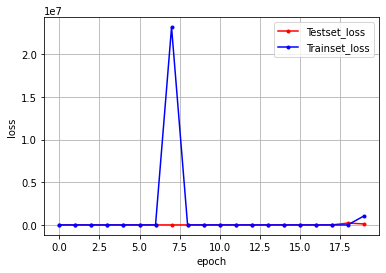

In [63]:
# Testset의 오차
y_vloss = history.history['val_loss']

# Trainset의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그리드 추가 및 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## **LSTM과 CNN을 조합해 영화 리뷰 분류하기**

In [64]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# seed값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# Trainset, Testset 나누기
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=5000)

# 데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)

x_train.shape, x_test.shape, Y_train, Y_test

17465344/17464789 [==============================] - 1s 0us/step


((25000, 100),
 (25000, 100),
 array([1, 0, 0, ..., 0, 1, 0]),
 array([0, 1, 1, ..., 0, 0, 0]))

In [65]:
# 모델링
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))

model.add((Conv1D(64, 5, padding='valid', activation='relu', strides=1)))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_5 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_100 (Dense)            (None, 1)                 56        
_________________________________________________________________
activation_1 (Activation)    (None, 1)               

In [66]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [67]:
# 모델 피팅
history = model.fit(x_train, Y_train, batch_size=100, epochs=5, validation_data=(x_test, Y_test))

# 테스트 정확도 출력
print("\n Test Accuracy : {:.4f}".format(model.evaluate(x_test, Y_test)[1]))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 14s 563us/step - loss: 0.4510 - accuracy: 0.7672 - val_loss: 0.3348 - val_accuracy: 0.8520
Epoch 2/5
25000/25000 [==============================] - 13s 537us/step - loss: 0.2880 - accuracy: 0.8787 - val_loss: 0.3267 - val_accuracy: 0.8588
Epoch 3/5
25000/25000 [==============================] - 13s 536us/step - loss: 0.2471 - accuracy: 0.9003 - val_loss: 0.3336 - val_accuracy: 0.8571
Epoch 4/5
25000/25000 [==============================] - 13s 537us/step - loss: 0.2091 - accuracy: 0.9179 - val_loss: 0.3466 - val_accuracy: 0.8542
Epoch 5/5
25000/25000 [==============================] - 4s 172us/step

 Test Accuracy : 0.8527


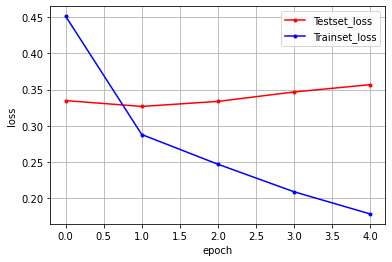

In [68]:
# Testset의 오차
y_vloss = history.history['val_loss']

# Trainset의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그리드 및 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# **19장 GAN, AutoEncoder 이용하기**

## **GAN 모델 만들기**

In [69]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model

import numpy as np
import matplotlib.pyplot as plt

# 생성자 모델 만들기
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=100, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((7, 7, 128)))
generator.add(UpSampling2D())

generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())

generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))

# 판별자 모델 만들기
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28, 28, 1), padding='same'))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))

discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding='same'))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())

discriminator.add(Dense(1, activation='sigmoid'))

# 판별자 모델 컴파일
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False # 학습하지 않게 설정

In [70]:
# 생성자와 판별자 모델을 연결 시키는 GAN 모델
ginput = Input(shape=(100,))

dis_output = discriminator(generator(ginput))
gan = Model(ginput, dis_output)

# GAN 모델 컴파일
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential_5 (Sequential)    (None, 28, 28, 1)         865281    
_________________________________________________________________
sequential_6 (Sequential)    (None, 1)                 212865    
Total params: 1,078,146
Trainable params: 852,609
Non-trainable params: 225,537
_________________________________________________________________


In [73]:
# GAN을 실행하는 함수
def gan_train(epoch, batch_size, saving_interval):

    # MNIST 데이터 불러오기
    (X_train, _), (_, _) = mnist.load_data()
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    # 데이터 정규분포화
    X_train = (X_train - 127.5) / 127.5
    true = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for i in range(epoch):
        # 실제 이미지를 판별자에 입력
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]
        d_loss_real = discriminator.train_on_batch(imgs, true)

        # 가상 이미지를 판별자에 입력
        noise = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(noise)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

        # 판별자와 생성자의 오차 계산
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        g_loss = gan.train_on_batch(noise, true)

        print('Epoch : {}, d_loss : {:.4f}, g_loss : {:.4f}'.format(i, d_loss, g_loss))

        # 중간 과정을 이미지로 저장
        if i % saving_interval == 0:
            # r, c = 5, 5
            noise = np.random.normal(0, 1, (25, 100))
            gen_imgs = generator.predict(noise)

            # 이미지 Rescale
            gen_imgs = 0.5 * gen_imgs + 0.5

            # 이미지 출력
            fig, axs = plt.subplots(5, 5)
            count = 0
            for j in range(5):
                for k in range(5):
                    axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap='gray')
                    axs[j, k].axis('off')
            count += 1
            fig.savefig('/content/gan_images/gan_mnist_{}.png'.format(i))

Epoch : 0, d_loss : 0.4210, g_loss : 1.5015
Epoch : 1, d_loss : 0.6302, g_loss : 1.5416
Epoch : 2, d_loss : 0.5736, g_loss : 1.4481
Epoch : 3, d_loss : 0.3547, g_loss : 1.7889
Epoch : 4, d_loss : 0.4485, g_loss : 1.7639
Epoch : 5, d_loss : 0.4849, g_loss : 1.6211
Epoch : 6, d_loss : 0.5828, g_loss : 1.6695
Epoch : 7, d_loss : 0.4822, g_loss : 1.6575
Epoch : 8, d_loss : 0.6177, g_loss : 1.7289
Epoch : 9, d_loss : 0.5593, g_loss : 1.5389
Epoch : 10, d_loss : 0.5822, g_loss : 1.4529
Epoch : 11, d_loss : 0.4519, g_loss : 1.6032
Epoch : 12, d_loss : 0.5041, g_loss : 1.6172
Epoch : 13, d_loss : 0.3369, g_loss : 1.4288
Epoch : 14, d_loss : 0.5068, g_loss : 1.3808
Epoch : 15, d_loss : 0.4378, g_loss : 1.7188
Epoch : 16, d_loss : 0.5434, g_loss : 1.4546
Epoch : 17, d_loss : 0.5274, g_loss : 1.6875
Epoch : 18, d_loss : 0.6220, g_loss : 1.5214
Epoch : 19, d_loss : 0.4682, g_loss : 1.8115
Epoch : 20, d_loss : 0.5659, g_loss : 1.5195
Epoch : 21, d_loss : 0.5763, g_loss : 1.1552
Epoch : 22, d_loss :

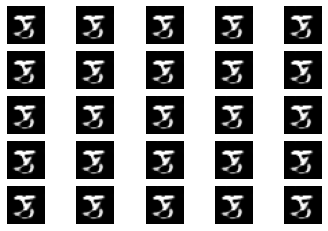

In [76]:
gan_train(51, 32, 200) # 책에서는 4001회를 하라했지만, 여기서는 51회만 실시함

## **AutoEncoder 만들기**

In [84]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense,Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

import matplotlib.pyplot as plt
import numpy as np

# MNist 데이터 셋 호출
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

In [87]:
# 생성자 모델 만들기
autoencoder = Sequential()

# 인코딩 부분
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

# 디코딩 부분
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

# 구조 확인
autoencoder.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 8, 8, 8)          

In [88]:
# 모델 컴파일
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=20, batch_size=128, validation_data=(X_test, X_test))

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2074 - val_loss: 0.1390
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1278 - val_loss: 0.1186
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1158 - val_loss: 0.1108
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1096 - val_loss: 0.1063
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1056 - val_loss: 0.1025
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1024 - val_loss: 0.1007
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0998 - val_loss: 0.0979
Epoch 8/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0977 - val_loss: 0.0954
Epoch 9/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0959 - val_loss: 0.0939
Epoch 10/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0944 - val_loss: 0.0925

In [89]:
# 학습 결과 출력
random_test = np.random.randint(X_test.shape[0], size=5)

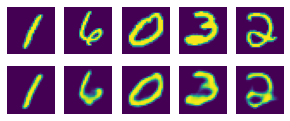

In [90]:
# 테스트 이미지 호출
ae_imgs = autoencoder.predict(X_test) # 오토 인코더 모델에 넣기

plt.figure(figsize=(7, 2)) # 출력 이미지 크기 설정

for i, image_idx in enumerate(random_test):
    # 랜덤으로 뽑은 이미지 차례로 나열
    ax = plt.subplot(2, 7, i+1)
    # 테스트할 이미지 먼저 보여줌
    plt.imshow(X_test[image_idx].reshape(28, 28))
    ax.axis('off')
    ax = plt.subplot(2, 7, 7+i+1)
    # 오토인코딩 결과를 다음 열에 출력
    plt.imshow(ae_imgs[image_idx].reshape(28, 28))
    ax.axis('off')

plt.show()

## **20장 전이학습을 통해 딥러닝 성능 극대화하기**

### **치매 환자와 일반인 환자의 뇌 구분**

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(3)
tf.random.set_seed(3)

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip = True, # 수평 대칭 이미지를 50% 확률로 만듦
                                   width_shift_range = 0.1, # 전체 크기의 10% 범위에서 좌우로 이동
                                   height_shift_range = 0.1, # 전체 크기의 10% 범위에서 위아래로 이동
                                   fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory('/content/train',
                                                    target_size = (150, 150),
                                                    batch_size = 5,
                                                    class_mode = 'binary')

# 테스트셋은 이미 부풀리기를 하지 않음
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory('/content/test',
                                                  target_size = (150, 150),
                                                  batch_size = 5,
                                                  class_mode = 'binary')

Found 160 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [4]:
# CNN 모델 적용
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [5]:
# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

In [6]:
# 모델 실행
history = model.fit_generator(train_generator,
                              steps_per_epoch = 100,
                              epochs = 20,
                              validation_data = test_generator,
                              validation_steps = 4)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
 32/100 [========>.....................] - 1s 34ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00


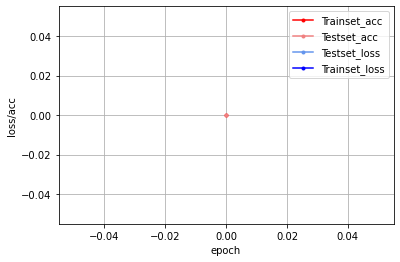

In [7]:
# 결과를 그래프로 표현
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, acc, marker='.', c='red', label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c='lightcoral', label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c='cornflowerblue', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()

### **전이 학습으로 모델 성능 극대화**

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, models, layers, optimizers, metrics
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(3)
tf.compat.v1.set_random_seed(3)

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip = True,
                                   width_shift_range = 0.1,
                                   fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory('train',
                                                    target_size = (150, 150),
                                                    batch_size = 5,
                                                    class_mode = 'binary')

test_datagen = ImageDataGenerator(rescale = 1./255,
                                  horizontal_flip = True,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1,
                                  fill_mode = 'nearest')

test_generator = test_datagen.flow_from_directory('test',
                                                  target_size = (150, 150),
                                                  batch_size = 5,
                                                  class_mode = 'binary')

Found 160 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [9]:
# VGGNet 모델 받아오기
transfer_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (150, 150, 3))
transfer_model.trainable = False
transfer_model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [10]:
finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64, activation='relu'))
finetune_model.add(Dense(2, activation='softmax'))
finetune_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                524352    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 15,239,170
Trainable params: 524,482
Non-trainable params: 14,714,688
_________________________________________________________________


In [11]:
# 모델 컴파일
finetune_model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

In [12]:
# 모델 실행
history = finetune_model.fit_generator(train_generator,
                              steps_per_epoch = 100,
                              epochs = 20,
                              validation_data = test_generator,
                              validation_steps = 4)

Epoch 1/20
 32/100 [========>.....................] - 1s 40ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00


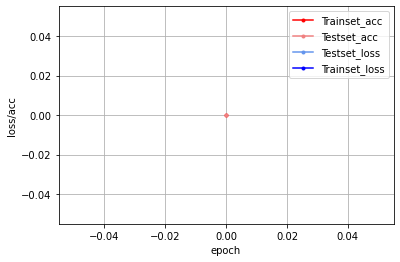

In [13]:
# 결과를 그래프로 표현
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, acc, marker='.', c='red', label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c='lightcoral', label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c='cornflowerblue', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()